In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [31]:
template_catalog = {197790: [197802, 198372, 198376, 198380, 198384],
                    197662: [198668, 199009, 199021, 199033],
                    197408: [197400, 197404, 197412],
                    197384: [197388, 197392],
                    197371: [197367, 197375, 197379]}

array([[197400, 197404, 197412], [197388, 197392],
       [197367, 197375, 197379], [198668, 199009, 199021, 199033],
       [197802, 198372, 198376, 198380, 198384]], dtype=object)

In [43]:
import lsst.daf.persistence as dp
#butler = dp.Butler('decam_lzogy_forcephot')
butler = dp.Butler('decam_rescaled_diffims')

df = None
#for template, sciImgs in template_catalog.items():
template = 197371
sciImgs = template_catalog[template]
for science in sciImgs:
    for ccdnum in range(1, 60):
        try:
            #sources = butler.get('forced_src', visit=197367, ccdnum=ccdnum)
            sources = butler.get('forced_src', visit=science, ccdnum=ccdnum)
            tmp = pd.DataFrame({col: sources.columns[col] for col in sources.schema.getNames()})
            #print template, science, ccdnum, tmp.shape
            if df is None:
                df = tmp
            else:
                df = df.append(tmp)
        except:
            continue

print df.shape
print df.base_PsfFlux_flag.values.sum()
print df.base_PsfFlux_flag_edge.values.sum()
print df.base_PsfFlux_flag_noGoodPixels.values.sum()
print df.base_TransformedCentroid_flag.values.sum()
#print df.ip_diffim_DipoleFit_flag_classification.values.sum()
df.head()

(73385, 20)
246
246
0
0


,base_PsfFlux_apCorr,base_PsfFlux_apCorrSigma,base_PsfFlux_flag,base_PsfFlux_flag_apCorr,base_PsfFlux_flag_edge,base_PsfFlux_flag_noGoodPixels,base_PsfFlux_flux,base_PsfFlux_fluxSigma,base_TransformedCentroid_flag,base_TransformedCentroid_x,base_TransformedCentroid_y,classification_dipole,coord_dec,coord_ra,diffim_base_PsfFlux_flux,diffim_base_PsfFlux_fluxSigma,objectId,parentObjectId,template_base_PsfFlux_flux,template_base_PsfFlux_fluxSigma
0,NaN,NaN,False,False,False,False,34594.214678,64.849700,False,576.721680,45.911247,1,-0.096097,3.306273,1878.971988,30458.796431,84768485325931010,0,33674.272380,42941.503046
1,NaN,NaN,False,False,False,False,-168.488874,65.732164,False,129.943329,52.033791,0,-0.095529,3.306282,-375.440830,3369.305094,84768485325931011,0,205.374436,9118.612816
2,NaN,NaN,False,False,False,False,256.457667,66.200053,False,1685.921631,62.955055,0,-0.097508,3.306291,423.435786,74.738126,84768485325931012,0,-153.469066,67.399019
3,NaN,NaN,False,False,False,False,20911.451783,64.515138,False,948.497681,78.063354,0,-0.096570,3.306313,6.644579,72.496342,84768485325931013,0,21969.893203,65.271439
4,NaN,NaN,False,False,False,False,30191.248920,66.138192,False,1715.939575,82.966141,1,-0.097546,3.306316,-1532.043638,74.567010,84768485325931014,0,34016.881213,66.916833


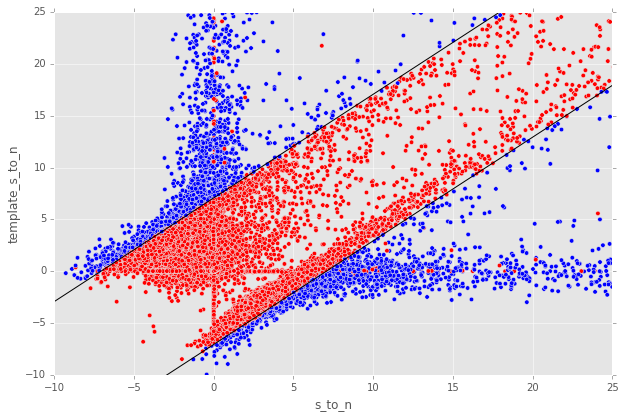

In [44]:
df[['base_PsfFlux_flux', 'template_base_PsfFlux_flux']].head()
df['s_to_n'] = df.base_PsfFlux_flux / df.base_PsfFlux_fluxSigma
df['template_s_to_n'] = df.template_base_PsfFlux_flux / df.template_base_PsfFlux_fluxSigma
df['diff_s_to_n'] = (df.base_PsfFlux_flux - df.template_base_PsfFlux_flux) / \
    np.sqrt(df.base_PsfFlux_fluxSigma**2. + df.template_base_PsfFlux_fluxSigma**2.)
#df[['s_to_n', 'template_s_to_n']].head()

plt.rcParams['figure.figsize'] = (10.0, 6.5)
#colors = np.where(df.ip_diffim_DipoleFit_flag_classification == 1, 'r', 'k')
colors = np.where(np.abs(df.diff_s_to_n) > 5., 'b', 'r')
df.plot.scatter('s_to_n', 'template_s_to_n', c=colors)
plt.xlim(-10, 25)
plt.ylim(-10, 25)
x = np.linspace(-25,25)
plt.plot(x, x-5*np.sqrt(2), 'k-')
plt.plot(x, x+5*np.sqrt(2), 'k-')

In [45]:
import lsst.daf.persistence as dp
butler = dp.Butler('decam_lzogy_forcephot')
#butler = dp.Butler('decam_rescaled_diffims')

df = None
#for template, sciImgs in template_catalog.items():
template = 197371
sciImgs = template_catalog[template]
for science in sciImgs:
    for ccdnum in range(1, 60):
        try:
            #sources = butler.get('forced_src', visit=197367, ccdnum=ccdnum)
            sources = butler.get('forced_src', visit=science, ccdnum=ccdnum)
            tmp = pd.DataFrame({col: sources.columns[col] for col in sources.schema.getNames()})
            #print template, science, ccdnum, tmp.shape
            if df is None:
                df = tmp
            else:
                df = df.append(tmp)
        except:
            continue

print df.shape
print df.base_PsfFlux_flag.values.sum()
print df.base_PsfFlux_flag_edge.values.sum()
print df.base_PsfFlux_flag_noGoodPixels.values.sum()
print df.base_TransformedCentroid_flag.values.sum()
print df.ip_diffim_DipoleFit_flag_classification.values.sum()
df.head()

(15307, 17)
0
0
0
0
14619


,base_PsfFlux_flag,base_PsfFlux_flag_edge,base_PsfFlux_flag_noGoodPixels,base_PsfFlux_flux,base_PsfFlux_fluxSigma,base_TransformedCentroid_flag,base_TransformedCentroid_x,base_TransformedCentroid_y,coord_dec,coord_ra,diffim_base_PsfFlux_flux,diffim_base_PsfFlux_fluxSigma,ip_diffim_DipoleFit_flag_classification,objectId,parentObjectId,template_base_PsfFlux_flux,template_base_PsfFlux_fluxSigma
0,False,False,False,228325.765148,64.927817,False,580.871704,44.437531,-0.096103,3.306271,NaN,NaN,1,84768485325930644,0,219337.314316,77554.123544
1,False,False,False,121484.933682,66.221419,False,1719.858643,81.998299,-0.097551,3.306315,490.807477,97.123202,1,84768485325930645,0,120444.657894,66.748707
2,False,False,False,21132.459896,64.630456,False,947.150513,79.010269,-0.096568,3.306314,492.006111,92.947726,1,84768485325930646,0,20962.723287,65.216365
3,False,False,False,12797.162212,64.733823,False,437.135010,101.025322,-0.095920,3.306344,436.663707,92.902064,1,84768485325930647,0,12251.410768,65.456288
4,False,False,False,17933.955778,66.194887,False,1801.230591,292.843292,-0.097655,3.306584,-766.556470,96.756228,1,84768485325930648,0,19850.600662,66.555246


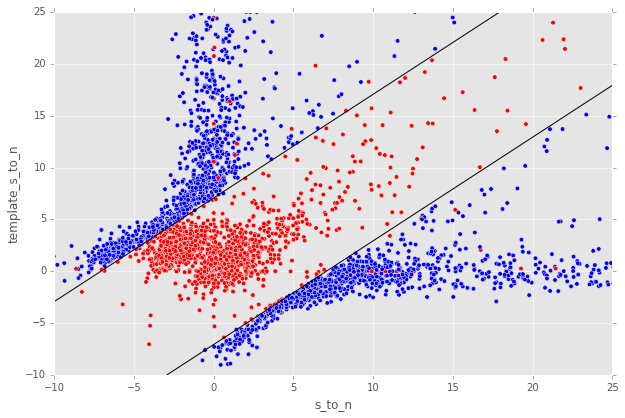

In [46]:
df[['base_PsfFlux_flux', 'template_base_PsfFlux_flux']].head()
df['s_to_n'] = df.base_PsfFlux_flux / df.base_PsfFlux_fluxSigma
df['template_s_to_n'] = df.template_base_PsfFlux_flux / df.template_base_PsfFlux_fluxSigma
df['diff_s_to_n'] = (df.base_PsfFlux_flux - df.template_base_PsfFlux_flux) / \
    np.sqrt(df.base_PsfFlux_fluxSigma**2. + df.template_base_PsfFlux_fluxSigma**2.)
#df[['s_to_n', 'template_s_to_n']].head()

plt.rcParams['figure.figsize'] = (10.0, 6.5)
#colors = np.where(df.ip_diffim_DipoleFit_flag_classification == 1, 'r', 'k')
colors = np.where(np.abs(df.diff_s_to_n) > 5., 'b', 'r')
df.plot.scatter('s_to_n', 'template_s_to_n', c=colors)
plt.xlim(-10, 25)
plt.ylim(-10, 25)
x = np.linspace(-25,25)
plt.plot(x, x-5*np.sqrt(2), 'k-')
plt.plot(x, x+5*np.sqrt(2), 'k-')